In [0]:
#Import Library
import pickle
import numpy as np

In [0]:
#Mengambil data training yg sudah disiapkan .txt file
with open('train_qa.txt', 'rb') as f:
    train_data = pickle.load(f)

In [0]:
#Mengambil data untuk test yg sudah disiapkan .txt file
with open('test_qa.txt', 'rb') as f:
    test_data = pickle.load(f)

In [4]:
#Melihat jumlah sampel data training
len(train_data)

10000

In [5]:
#Melihat jumlah sampel data test 
len(test_data)

1000

In [6]:
#Contoh dari salah satu sampel data training
train_data[10]

(['Sandra',
  'went',
  'back',
  'to',
  'the',
  'hallway',
  '.',
  'Sandra',
  'moved',
  'to',
  'the',
  'office',
  '.'],
 ['Is', 'Sandra', 'in', 'the', 'office', '?'],
 'yes')

In [7]:
' '.join(train_data[10][0])

'Sandra went back to the hallway . Sandra moved to the office .'

In [8]:
' '.join(train_data[10][1])

'Is Sandra in the office ?'

In [9]:
train_data[10][2]

'yes'

In [0]:
#Langkah pertama adalah membangun vocabulary dengan data txt kita
#Akan digunakan training datanya saja
#Nantinya mungkin mesti digunakan baik training maupun test set nya
#karena dataset nya hanya sedikit kata-kata nya

In [0]:
#Pertama akan dibangun satu set dari semua kata-kata di dataset
vocab = set()
for story, question, answer in train_data:
    vocab = vocab.union(set(story)) #Set mengeluarkan kata-kata unik pada kalimat
                                    #Union menyatukan elemen unik yg sama dari suatu pasang set
    vocab = vocab.union(set(question))

In [0]:
#Menambah kata-kata 'no' dan 'yes' pada vocabulary
vocab.add('no')
vocab.add('yes')

In [13]:
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [0]:
#Kalkulasi panjang vocab (len) dan menambah 1 untuk placeholder Keras
#Placeholder digunakan untuk feed in datanya ke network. 
vocab_len = len(vocab) + 1

In [15]:
vocab_len

38

In [0]:
#Sekarang akan dikalkulasi story terpanjang dan question terpanjang
#Dibutuhkan untuk Keras pad sequences.
#Training layer Keras inputnya mesti sama length nya 
#Jadi kita butuh untuk pad
all_data = test_data + train_data

In [0]:
all_story_lens = [len(data[0]) for data in all_data]

In [0]:
max_story_len = (max(all_story_lens))

In [0]:
max_question_len = max([len(data[1]) for data in all_data])

In [20]:
#Import pad_sequences dan Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.preprocessing.text import Tokenizer

Using TensorFlow backend.


In [0]:
#Membuat sebuah instance dari objek yang di tokenize
tokenizer = Tokenizer(filters = [])
tokenizer.fit_on_texts(vocab)

In [22]:
#Dictionary yang memetakan setiap kata di vocab ke sebuah index
#Sudah otmatis di lowercase
#Tokenizer ini dapat memberikan index yang berbeda untuk kata yg berbeda,tergantung kapan kita run
tokenizer.word_index

{'.': 4,
 '?': 20,
 'apple': 19,
 'back': 32,
 'bathroom': 6,
 'bedroom': 28,
 'daniel': 1,
 'discarded': 37,
 'down': 17,
 'dropped': 10,
 'football': 34,
 'garden': 2,
 'got': 18,
 'grabbed': 9,
 'hallway': 23,
 'in': 14,
 'is': 25,
 'john': 22,
 'journeyed': 24,
 'kitchen': 31,
 'left': 15,
 'mary': 36,
 'milk': 8,
 'moved': 16,
 'no': 27,
 'office': 13,
 'picked': 5,
 'put': 11,
 'sandra': 21,
 'the': 30,
 'there': 3,
 'to': 29,
 'took': 7,
 'travelled': 33,
 'up': 12,
 'went': 26,
 'yes': 35}

In [0]:
#Tokenize stories, questions dan answers:
train_story_text = []
train_question_text = []
train_answers = []

In [0]:
#Memisahkan setiap elements
for story,question,answer in train_data:
    train_story_text.append(story)
    train_question_text.append(question) 
    train_answers.append(answer)

In [0]:
#KOnversi teks menjadi index-index 
train_story_seq = tokenizer.texts_to_sequences(train_story_text)

In [0]:
#Membuat sebuah fungsi untuk vectorizing stories, questions dan answers nya:
def vectorize_stories(data,word_index = tokenizer.word_index, max_story_len = max_story_len, max_question_len = max_question_len):
    #pertama vectorized stories:
    X = []
    #lalu vectorized questions:
    Xq = []
    #dan vectorized answers:
    Y = []
    
    for story, question, answer in data:
        #Mendapatkan index-index untuk setiap kata di Story
        x = [word_index[word.lower()] for word in story]
        #Mendapatkan index-index untuk setiap kata di Question
        xq = [word_index[word.lower()] for word in question]
        #Untuk jawaban-jawaban (answers)
        y = np.zeros(len(word_index) + 1) #Index 0 di reserve saat padding sequences nya
        y[word_index[answer]] = 1
        
        X.append(x)
        Xq.append(xq)
        Y.append(y)
        
    #Sekarang kita harus pad sequence-sequence ini:
    return(pad_sequences(X,maxlen=max_story_len), pad_sequences(Xq, maxlen=max_question_len), np.array(Y))

In [0]:
inputs_train, questions_train, answers_train = vectorize_stories(train_data)

In [0]:
inputs_test, questions_test, answers_test = vectorize_stories(test_data)

In [29]:
inputs_train[0]

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, 36, 16, 29, 30,  6,  4, 21, 24, 29,
       30, 28,  4], dtype=int32)

In [30]:
train_story_text[0]

['Mary',
 'moved',
 'to',
 'the',
 'bathroom',
 '.',
 'Sandra',
 'journeyed',
 'to',
 'the',
 'bedroom',
 '.']

In [31]:
train_story_seq[0]

[36, 16, 29, 30, 6, 4, 21, 24, 29, 30, 28, 4]

In [0]:
#Membangun Network nya
#Imports
from keras.models import Sequential, Model
from keras.layers.embeddings import Embedding
from keras.layers import Input, Activation, Dense, Permute, Dropout, add, dot, concatenate, LSTM

In [33]:
#Kita perlu membuat placeholders 
#Fungsi input diunakan untuk membuat sebuah tensor Keras
#PLACEHOLDER shape = (max_story_len,batch_size)
#Ini adalah placeholder kita untuk inputs, siap menerima batch stories dan questions
input_sequence = Input((max_story_len,)) #Karena kita blm tahu ukuran batch size nya
question = Input((max_question_len,))

In [34]:
#Membuat input encoder M:
input_encoder_m = Sequential()
input_encoder_m.add(Embedding(input_dim=vocab_len,output_dim = 64)) #From paper
input_encoder_m.add(Dropout(0.3))

#Outputs: (Samples, story_maxlen,embedding_dim)
#Memberikan list dari panjang sampel dimana setiap masing-masing item
#memiliki panjang sebesar paniang max story
#Dan setiap word di embed di dalam dimensi embedding



Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [0]:
#Membuat input encoder C:
input_encoder_c = Sequential()
input_encoder_c.add(Embedding(input_dim=vocab_len,output_dim = max_question_len)) #From paper
input_encoder_c.add(Dropout(0.3))

#Outputs: (samples, story_maxlen, max_question_len)

In [0]:
#Membuat question encoder:
question_encoder = Sequential()
question_encoder.add(Embedding(input_dim=vocab_len,output_dim = 64,input_length=max_question_len)) #From paper
question_encoder.add(Dropout(0.3))

#Outputs: (samples, question_maxlen, embedding_dim)

In [0]:
#Sekarang, meng encode sequence nya, menempatkan placeholders ke dalam encoder kita
input_encoded_m = input_encoder_m(input_sequence)
input_encoded_c = input_encoder_c(input_sequence)
question_encoded = question_encoder(question)

In [0]:
#Menggunakan dot product untuk menghitung kesamaan antara input encoded m dan question
match = dot([input_encoded_m,question_encoded], axes = (2,2))
match = Activation('softmax')(match)

In [0]:
#Untuk response yg ingin kita add ini match dengan output dari input_encoded_c
response = add([match,input_encoded_c])
response = Permute((2,1))(response) #Permute Layer: permutes dimensi dari input

In [0]:
#Sekali kita dapat response nya kita bisa concatenate nya dengan question encoded
answer = concatenate([response, question_encoded])

In [41]:
answer

<tf.Tensor 'concatenate_1/concat:0' shape=(?, 6, 220) dtype=float32>

In [0]:
#Kurangi tensor dari answer dengan sebuah RNN (LSTM)
answer = LSTM(32)(answer)

In [0]:
#Regularisasi dengan dropout
answer = Dropout(0.5)(answer)
#Output layer:
answer = Dense(vocab_len)(answer) #Output shape: (Samples, Vocab_size) #Yes atau no dan all 0s

In [0]:
#Sekarang kita perlu output sebuah probability untuk vocab nya, dengan softmax
answer = Activation('softmax')(answer)

In [0]:
#Sekarang kita bangun model finalnya
model = Model([input_sequence,question], answer)

In [46]:
model.compile(optimizer='rmsprop', loss = 'categorical_crossentropy', metrics = ['accuracy'])
#Kategorikal karena cara training yg kita pilih
#Kita sbnrnya dapat melihat kata apapun dari vocab sebagai output
#namun, kita seharusnya dapat melihat hanya yes or no

In [47]:
#Summary dari Model
model.summary()

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 156)          0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            (None, 6)            0                                            
__________________________________________________________________________________________________
sequential_1 (Sequential)       multiple             2432        input_1[0][0]                    
__________________________________________________________________________________________________
sequential_3 (Sequential)       (None, 6, 64)        2432        input_2[0][0]                    
____________________________________________________________________________________________

In [48]:
#Training dan testing modelnya
history = model.fit([inputs_train,questions_train],answers_train, batch_size = 32, epochs = 100, validation_data = ([inputs_test,questions_test],answers_test))

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where



Train on 10000 samples, validate on 1000 samples
Epoch 1/100





10000/10000 [==============================] - 7s 696us/step - loss: 0.9263 - acc: 0.4941 - val_loss: 0.6945 - val_acc: 0.4970
Epoch 2/100
10000/10000 [==============================] - 5s 544us/step - loss: 0.7038 - acc: 0.5017 - val_loss: 0.6934 - val_acc: 0.5030
Epoch 3/100
10000/10000 [==============================] - 5s 546us/step - loss: 0.6954 - acc: 0.5068 - val_loss: 0.6933 - val_acc: 0.4970
Epoch 4/100
10000/10000 [==============================] - 5s 545us/step - loss: 0.6948 - acc: 0.5016 - val_loss: 0.6935 - val_acc: 0.4970
Epoch 5/100
10000/10000 [==============================] - 6s 572us/step - loss: 0.6940 - acc: 0.5058 - val_loss: 0.6932 - val_acc: 0.5030
Epoch 6/100
10000/10000 [==============================] - 6s 581us/step - loss: 0.6944 - acc: 0.5066 - val_loss: 0.6940 - val_acc: 0.5030
Epoch 7/100
100

In [0]:
filename = 'Z_chatbot_100_epochs.h5'
model.save(filename)

dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


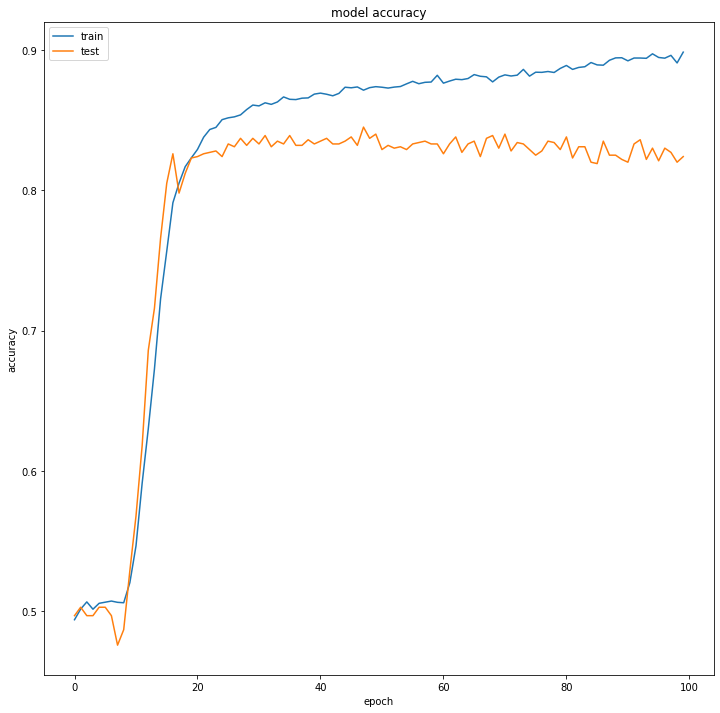

In [50]:
#Mem plot kenaikan akurasi sejalan dengan kita tingkatkan jumlah tarining epochs
#Kita dapat melihat bahwa tanpa trainig akurasinya sekitar 50%, tebak acak
import matplotlib.pyplot as plt
%matplotlib inline
print(history.history.keys())
#Summary history untuk akurasi
plt.figure(figsize=(12,12))
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [0]:
#Load model yg sudah kita train dan simpan
model.load_weights('Z_chatbot_100_epochs.h5')

In [0]:
#Memeriksa prediksi pada test set
#Probabilitas utk setiap masing-masing kata di vocab
pred_results = model.predict(([inputs_test,questions_test]))

In [53]:
#Test data point
test_data[0]

(['Mary',
  'got',
  'the',
  'milk',
  'there',
  '.',
  'John',
  'moved',
  'to',
  'the',
  'bedroom',
  '.'],
 ['Is', 'John', 'in', 'the', 'kitchen', '?'],
 'no')

In [54]:
#Ini adalah probabilities-probabilities utk vocab words menggunakan kalimat pertama
pred_results[0]

array([2.1341461e-15, 2.2670773e-15, 2.6102163e-15, 2.1703441e-15,
       2.4874099e-15, 2.6484099e-15, 2.4458680e-15, 2.4023974e-15,
       2.8556397e-15, 2.6296750e-15, 2.8612117e-15, 2.1914502e-15,
       2.6382357e-15, 3.2320641e-15, 2.8597276e-15, 2.3049668e-15,
       2.1675471e-15, 2.5403043e-15, 2.5445037e-15, 2.4755300e-15,
       2.0717073e-15, 2.9803352e-15, 2.4965834e-15, 2.3474805e-15,
       2.2195842e-15, 2.7222525e-15, 2.7874677e-15, 9.9999475e-01,
       2.7689636e-15, 2.7653326e-15, 2.3134323e-15, 2.9331220e-15,
       2.8221444e-15, 2.1258744e-15, 2.4554877e-15, 5.2191549e-06,
       2.2696906e-15, 3.0180442e-15], dtype=float32)

In [0]:
val_max = np.argmax(pred_results[0])

In [56]:
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
print(k)

no


In [57]:
#Melihat probability (pada code asli hasilnya prob 1.0)
#Pada code aslinya epoch ditentukan 1000, namun saya hanya menjalankan 100 karena
#PC selalu hang di tengah-tengah prosesnya
pred_results[0][val_max]

0.99999475

In [58]:
#Sekarang kita dapat membuat question kita sendiri menggunakan vocab yg kita punya
vocab

{'.',
 '?',
 'Daniel',
 'Is',
 'John',
 'Mary',
 'Sandra',
 'apple',
 'back',
 'bathroom',
 'bedroom',
 'discarded',
 'down',
 'dropped',
 'football',
 'garden',
 'got',
 'grabbed',
 'hallway',
 'in',
 'journeyed',
 'kitchen',
 'left',
 'milk',
 'moved',
 'no',
 'office',
 'picked',
 'put',
 'the',
 'there',
 'to',
 'took',
 'travelled',
 'up',
 'went',
 'yes'}

In [0]:
my_story = 'Sandra picked up the milk . Mary travelled left . '

In [60]:
my_story.split()

['Sandra',
 'picked',
 'up',
 'the',
 'milk',
 '.',
 'Mary',
 'travelled',
 'left',
 '.']

In [0]:
my_question = 'Sandra got the milk ?'

In [62]:
my_question.split()

['Sandra', 'got', 'the', 'milk', '?']

In [0]:
#Menempatkan data pada format yg sama spt sblmnya
my_data = [(my_story.split(), my_question.split(),'yes')]

In [0]:
#Vectorize data ini
my_story, my_ques, my_ans = vectorize_stories(my_data)

In [0]:
#Membuat prediksi
pred_results = model.predict(([my_story,my_ques]))

In [0]:
val_max = np.argmax(pred_results[0])

In [67]:
#Prediksi yang benar
for key,val in tokenizer.word_index.items():
    if val == val_max:
        k = key
print(k)

yes


In [68]:
#Nilai Confidence nya
pred_results[0][val_max]

0.9265095